In [1]:
import sys
import os
sys.path.append("../measuring_volume")
sys.path.append("..")
import measuring_volume.convexhull_volume2 as cv
import measuring_volume.get_top_data as gtd

In [4]:
target_dir1 = "../../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1"
cv.convexhull_volume_all_strands_meandev(target_dir1)
strands2particle, particle2strand = gtd.get_particle_strands_data(target_dir1)
print(float(len(strands2particle)))

../../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/last_conf_L1-GA100000-0.80-ERT-0_277_1.dat.dat.rxyz is exist.
../../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/last_conf_L1-GA100000-0.80-ERT-0_277_1.dat.dat.rxyz
35
{1: 2.2787470722725742, 2: 4.36081328167291, 3: 5.969086255531898, 4: 5.4463676881747185, 5: 2.504984532616093, 6: 4.833366457432617, 7: 4.159856229794585, 8: 6.578617499815084, 9: 4.124102389983555, 10: 6.048500748306193, 11: 4.062060573794497, 12: 5.160341052933834, 13: 2.003678552550341, 14: 4.084113437795339, 15: 3.464832954573095, 16: 8.031827460280835, 17: 5.8413424976090935, 18: 3.4309044528058545, 19: 3.348656305241381, 20: 4.344773711313973, 21: 1.8038189218407632, 22: 4.09057008182636, 23: 6.204736495910803, 24: 2.4771904268715077, 25: 3.417452223239591, 26: 6.171050992867982, 27: 5.037509466916052, 28: 3.0720327133917524, 29: 2.4374800751397236, 30: 7.896980204779741, 31: 2.477189505091565, 32: 5.780347457313488, 33: 3.896438971019802, 34: 2.67861224

In [6]:
import os

# ディレクトリを移動する
os.chdir("/Users/hyakuzukamaya/Desktop/lab/SA-EDS/scripts")

# 現在の作業ディレクトリを表示する
print(os.getcwd())


/Users/hyakuzukamaya/Desktop/lab/SA-EDS/scripts


In [8]:
import measuring_volume.run_output_bonds as rob
import common.check_dir as cd
import common.get_target_file as gtf

target_dir4 = "../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1"
cd.new_input(target_dir4)
print(gtf.file_dic(target_dir4))
# rob.make_bonds(target_dir4)
# cv.convexhull_volume_all_strands(target_dir4)
cv.convexhull_volume_all_strands_meandev(target_dir4)
strands2particle, particle2strand = gtd.get_particle_strands_data(target_dir4)
print(float(len(strands2particle)))
print(strands2particle)
print(particle2strand)

../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/new_input_L1-GA100000-0.80-ERT-0_277_1 is created
{'energy_trap': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/energy_trap_L1-GA100000-0.80-ERT-0_277_1.dat', 'topology': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/generated_L1-GA100000-0.80-ERT-0_277_1.top', 'trajectory_trap': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/trajectory_trap_L1-GA100000-0.80-ERT-0_277_1.dat', 'new_input': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/new_input_L1-GA100000-0.80-ERT-0_277_1', 'forces': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/forces_L1-GA100000-0.80-ERT-0_277_1.dat', 'req': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/req_L1-GA100000-0.80-ERT-0_277_1.txt', 'bond': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/bonds', 'generated': '../initial/L1_initial_0/L1-GA100000-0.80-ERT-0_277_1/generated_L1-GA100000-0.80-ERT-0_277_1.dat', 'hb_energy_seq_dep': '../initial/L1_initial_0/L1-

In [10]:
import pickle
import matplotlib.pyplot as plt

def graph_temp(file_path='../../data/dic/L1_data_initial.pkl', type_of_l = "L1", title=""):
    # pklファイルからデータを読み込む
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    print(data)


    # データの準備
    mean_volumes = {
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    }
    ratio_of_volumes = {
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    }

    for key, value in data.items():
        mean_volumes[key[0]].append(value['mean_volume'])
        ratio_of_volumes[key[0]].append(value['ratio_of_volume'])
        if value['mean_volume'] > 160:
            print(key, value)

    # 箱ひげ図の作成
    plt.figure(figsize=(10, 6))
    plt.boxplot(mean_volumes.values(), labels=mean_volumes.keys())
    plt.title(f'{type_of_l} of average volume {title}', fontsize=30)
    plt.ylabel('average volume', fontsize=30)
    plt.xlabel('temperatures (K)', fontsize=30)
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.boxplot(ratio_of_volumes.values(), labels=ratio_of_volumes.keys())
    plt.title(f'{type_of_l} of Ratio of strand numbers {title}', fontsize=30)
    plt.ylabel('Ratio of strand numbers', fontsize=30)
    plt.xlabel('temperatures (K)', fontsize=30)
    plt.show()

{('277', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 4.417646735645525, 'deviation_of_volume': 10.099504938362076}, ('298', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 5.33229981330206, 'deviation_of_volume': 10.099504938362076}, ('308', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 6.351219489362008, 'deviation_of_volume': 10.099504938362076}, ('318', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 7.083178938893397, 'deviation_of_volume': 10.099504938362076}, ('328', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 8.16931122835199, 'deviation_of_volume': 10.099504938362076}, ('338', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 8.95752527741635, 'deviation_of_volume': 10.099504938362076}, ('348', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_vol

/var/folders/t5/9_w43txj551cpbyq7d7b78000000gn/T/ipykernel_42032/2571838536.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(mean_volumes.values(), labels=mean_volumes.keys())


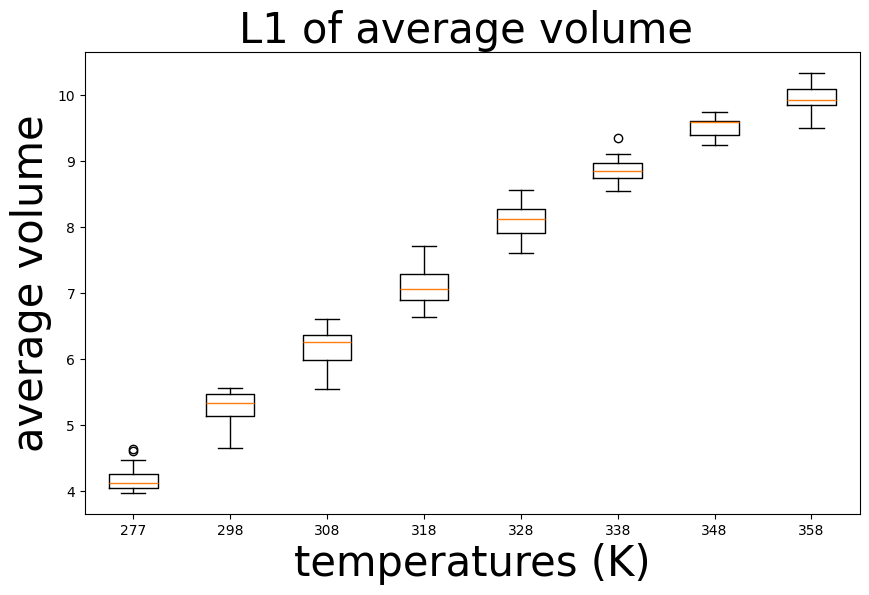

/var/folders/t5/9_w43txj551cpbyq7d7b78000000gn/T/ipykernel_42032/2571838536.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ratio_of_volumes.values(), labels=ratio_of_volumes.keys())


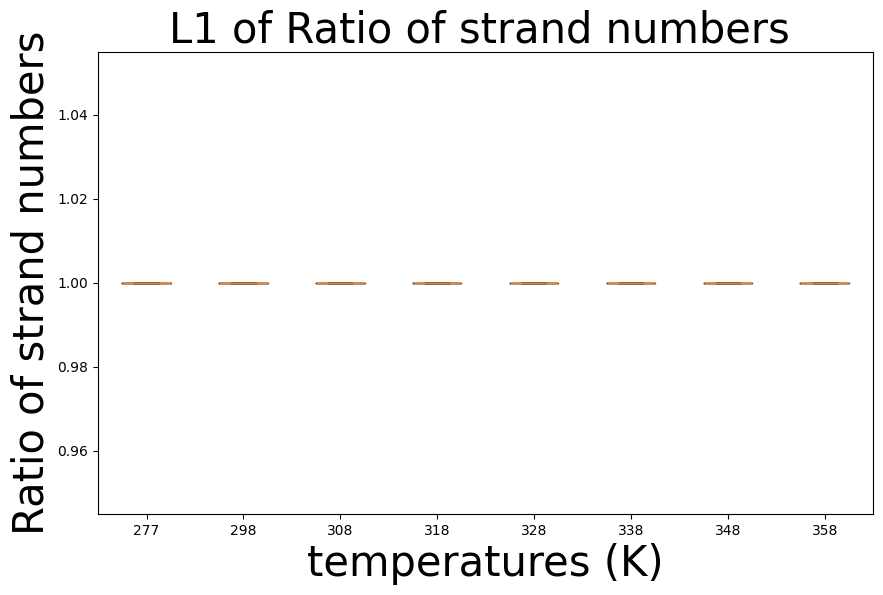

{('338', '../input/results/QD_1/L1_1/r1712111319184-80'): {'ratio_of_volume': 0.9760000000000002, 'mean_volume': 9.653152256827964, 'deviation_of_volume': 7.176750741935112}, ('328', '../input/results/QD_1/L1_1/r1712111319184-80'): {'ratio_of_volume': 0.9719999999999999, 'mean_volume': 10.973869736684916, 'deviation_of_volume': 7.110216007143668}, ('298', '../input/results/QD_1/L1_1/r1712111319184-80'): {'ratio_of_volume': 0.7839999999999999, 'mean_volume': 17.13329026327023, 'deviation_of_volume': 7.391409561410656}, ('277', '../input/results/QD_1/L1_1/r1712111319184-80'): {'ratio_of_volume': 0.6839999999999999, 'mean_volume': 18.275569283726423, 'deviation_of_volume': 7.24967631940181}, ('358', '../input/results/QD_1/L1_1/r1712111319184-80'): {'ratio_of_volume': 1.0, 'mean_volume': 9.927622545192039, 'deviation_of_volume': 7.211102550927977}, ('318', '../input/results/QD_1/L1_1/r1712111319184-80'): {'ratio_of_volume': 0.9279999999999999, 'mean_volume': 10.722725587818264, 'deviation_

/var/folders/t5/9_w43txj551cpbyq7d7b78000000gn/T/ipykernel_42032/2571838536.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(mean_volumes.values(), labels=mean_volumes.keys())


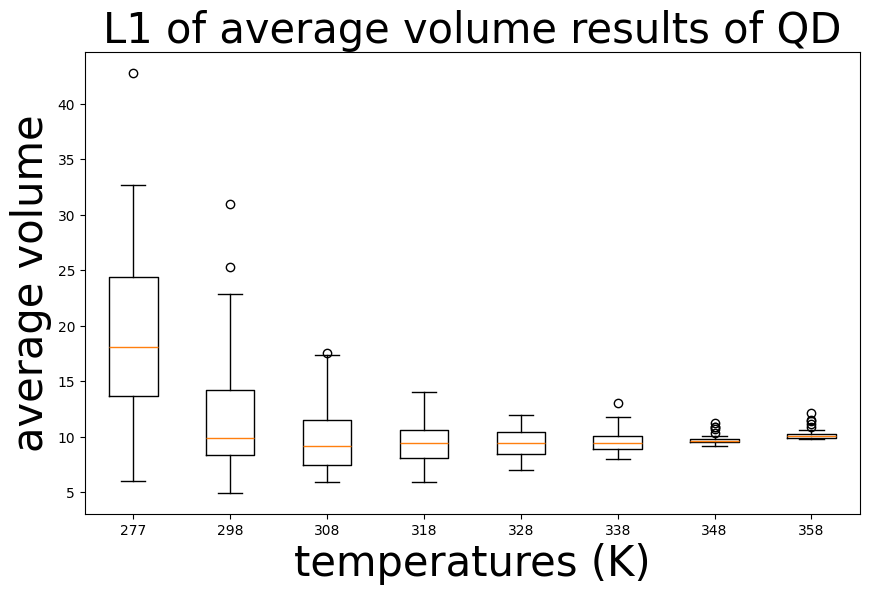

/var/folders/t5/9_w43txj551cpbyq7d7b78000000gn/T/ipykernel_42032/2571838536.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ratio_of_volumes.values(), labels=ratio_of_volumes.keys())


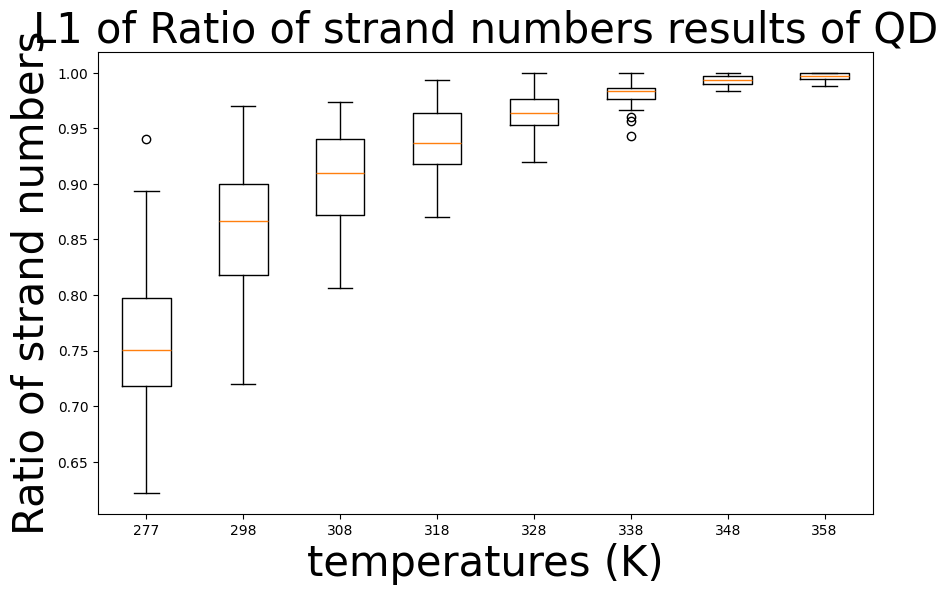

In [11]:
graph_temp(file_path='../../dataset/L1_data_initial.pkl', type_of_l = "L1")
graph_temp(file_path='../../dataset/L1_data_QD_1.pkl', type_of_l = "L1", title="results of QD")
# graph_temp(file_path='../../data/dic/L2_data_initial.pkl', type_of_l = "L2")
# graph_temp(file_path='../../data/dic/L3_data_initial.pkl', type_of_l = "L3")

In [12]:
# pklファイルからデータを読み込む
with open('../../dataset/L1_data_initial.pkl', 'rb') as f:
    data = pickle.load(f)

print(data)

{('277', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 4.417646735645525, 'deviation_of_volume': 10.099504938362076}, ('298', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 5.33229981330206, 'deviation_of_volume': 10.099504938362076}, ('308', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 6.351219489362008, 'deviation_of_volume': 10.099504938362076}, ('318', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 7.083178938893397, 'deviation_of_volume': 10.099504938362076}, ('328', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 8.16931122835199, 'deviation_of_volume': 10.099504938362076}, ('338', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_volume': 8.95752527741635, 'deviation_of_volume': 10.099504938362076}, ('348', 'home/user/SA-EDS/initial/L1_initial_0'): {'ratio_of_volume': 1.0, 'mean_vol

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def graph_temp(file_path1='../../dataset/L1_data_initial.pkl', file_path2='../../dataset/L2_data_initial.pkl', file_path3='../../dataset/L3_data_initial.pkl', title=""):
    # pklファイルからデータを読み込む
    with open(file_path1, 'rb') as f:
        data1 = pickle.load(f)
    with open(file_path2, 'rb') as f:
        data2 = pickle.load(f)
    with open(file_path3, 'rb') as f:
        data3 = pickle.load(f)

    # データの準備
    mean_volumes = {
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    }
    ratio_of_volumes = {
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    }
    
    L1_ave = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L1_ratio = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L2_ave = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L2_ratio = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L3_ave = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L3_ratio = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する

    for key, value in data1.items():
        L1_ave[key[0]].append(value['mean_volume'])
        L1_ratio[key[0]].append(value['ratio_of_volume'])
    for key, value in data2.items():
        L2_ave[key[0]].append(value['mean_volume'])
        L2_ratio[key[0]].append(value['ratio_of_volume'])
    for key, value in data3.items():
        L3_ave[key[0]].append(value['mean_volume'])
        L3_ratio[key[0]].append(value['ratio_of_volume'])


    L1_ave = pd.DataFrame(L1_ave.copy())  # 新しいオブジェクトを生成する
    L2_ave = pd.DataFrame(L2_ave.copy())  # 新しいオブジェクトを生成する
    L3_ave = pd.DataFrame(L3_ave.copy())  # 新しいオブジェクトを生成する
    L1_ratio = pd.DataFrame(L1_ratio)
    L2_ratio = pd.DataFrame(L2_ratio)
    L3_ratio = pd.DataFrame(L3_ratio)

    # merge the two data frames to one data frame
    L1_ave_melt = pd.melt(L1_ave)
    L1_ave_melt['species'] = 'L1 average'
    L2_ave_melt = pd.melt(L2_ave)
    L2_ave_melt['species'] = 'L2 average'
    L3_ave_melt = pd.melt(L3_ave)
    L3_ave_melt['species'] = 'L3 average'

    L1_ratio_melt = pd.melt(L1_ratio)
    L1_ratio_melt['species'] = 'L1 ratio'
    L2_ratio_melt = pd.melt(L2_ratio)
    L2_ratio_melt['species'] = 'L2 ratio'
    L3_ratio_melt = pd.melt(L3_ratio)
    L3_ratio_melt['species'] = 'L3 ratio'

    df_ave = pd.concat([L1_ave_melt, L2_ave_melt, L3_ave_melt], axis=0)
    df_ratio = pd.concat([L1_ratio_melt, L2_ratio_melt, L3_ratio_melt], axis=0)
    print(df_ave.head())
    print(df_ratio.head())


    # 箱ひげ図の作成
    # plt.figure(figsize=(10, 6))
    # plt.boxplot(mean_volumes.values(), labels=mean_volumes.keys())
    # plt.title(f'{type_of_l} of average volume {title}', fontsize=30)
    # plt.ylabel('average volume', fontsize=30)
    # plt.xlabel('temperatures (K)', fontsize=30)
    # plt.show()
    # plt.figure(figsize=(10, 6))
    # plt.boxplot(ratio_of_volumes.values(), labels=ratio_of_volumes.keys())
    # plt.title(f'{type_of_l} of Ratio of strand numbers {title}', fontsize=30)
    # plt.ylabel('Ratio of strand numbers', fontsize=30)
    # plt.xlabel('temperatures (K)', fontsize=30)
    # plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.boxplot(x='variable', y='value', data=df_ave, hue='species', palette='Dark2', ax=ax)

    ax.set_xlabel('compare of average volume')
    ax.set_ylabel('average volume')
    # ax.set_ylim(0, 40)
    ax.legend()

    plt.show()
  
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.boxplot(x='variable', y='value', data=df_ratio, hue='species', palette='Dark2', ax=ax)

    ax.set_xlabel('compare of ratio')
    ax.set_ylabel('ratio volume')
    # ax.set_ylim(0, 40)
    ax.legend()

    plt.show()
  

  variable     value     species
0      277  4.417647  L1 average
1      277  4.195186  L1 average
2      277  3.976527  L1 average
3      277  3.980378  L1 average
4      277  4.016334  L1 average
  variable  value   species
0      277    1.0  L1 ratio
1      277    1.0  L1 ratio
2      277    1.0  L1 ratio
3      277    1.0  L1 ratio
4      277    1.0  L1 ratio


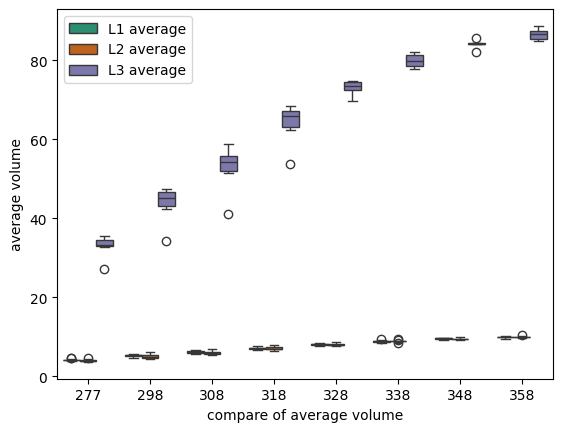

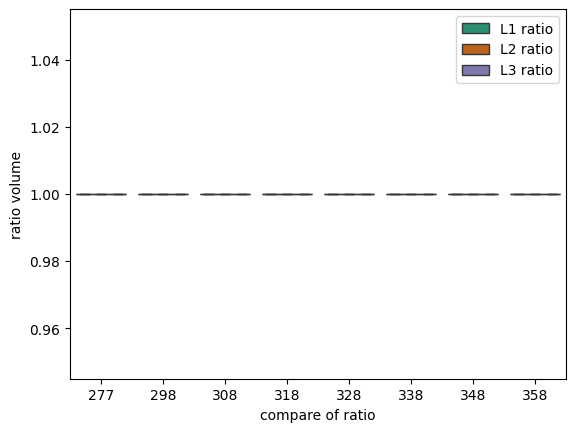

In [16]:
graph_temp()

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


def graph_temp_2(file_path1='../dataset/L1_data_initial.pkl', file_path2='../dataset/L1_data_QD_1.pkl',  title=""):
    # pklファイルからデータを読み込む
    with open(file_path1, 'rb') as f:
        data1 = pickle.load(f)
    with open(file_path2, 'rb') as f:
        data2 = pickle.load(f)

    # データの準備
    mean_volumes = {
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    }
    ratio_of_volumes = {
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    }
    
    L1_ave = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L1_ratio = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L2_ave = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    L2_ratio = dict({
                    "277" : [],
                    "298" : [],
                    "308" : [],
                    "318" : [],
                    "328" : [],
                    "338" : [],
                    "348" : [],
                    "358" : [],
                    })  # 新しい辞書オブジェクトを生成する
    for key, value in data1.items():
        L1_ave[key[0]].append(value['mean_volume'])
        L1_ratio[key[0]].append(value['ratio_of_volume'])
    for key, value in data2.items():
        L2_ave[key[0]].append(value['mean_volume'])
        L2_ratio[key[0]].append(value['ratio_of_volume'])

    # #Emergency fix REMOVE
    L2_ave["277"].pop()
    L2_ratio["277"].pop()
    for key in L2_ratio:
        print(key, len(L2_ratio[key]))
    
    L1_ave = pd.DataFrame(L1_ave.copy())  # 新しいオブジェクトを生成する
    L2_ave = pd.DataFrame(L2_ave.copy())  # 新しいオブジェクトを生成する
    L1_ratio = pd.DataFrame(L1_ratio)
    L2_ratio = pd.DataFrame(L2_ratio)

    # merge the two data frames to one data frame
    L1_ave_melt = pd.melt(L1_ave)
    L1_ave_melt['species'] = 'L1 initial average volume'
    L2_ave_melt = pd.melt(L2_ave)
    L2_ave_melt['species'] = 'L1 QD results average volume'

    L1_ratio_melt = pd.melt(L1_ratio)
    L1_ratio_melt['species'] = 'L1 initial ratio'
    L2_ratio_melt = pd.melt(L2_ratio)
    L2_ratio_melt['species'] = 'L1 second ratio'

    df_ave = pd.concat([L1_ave_melt, L2_ave_melt], axis=0)
    df_ratio = pd.concat([L1_ratio_melt, L2_ratio_melt], axis=0)
    print(df_ave.head())
    print(df_ratio.head())


    # 箱ひげ図の作成
    # plt.figure(figsize=(10, 6))
    # plt.boxplot(mean_volumes.values(), labels=mean_volumes.keys())
    # plt.title(f'{type_of_l} of average volume {title}', fontsize=30)
    # plt.ylabel('average volume', fontsize=30)
    # plt.xlabel('temperatures (K)', fontsize=30)
    # plt.show()
    # plt.figure(figsize=(10, 6))
    # plt.boxplot(ratio_of_volumes.values(), labels=ratio_of_volumes.keys())
    # plt.title(f'{type_of_l} of Ratio of strand numbers {title}', fontsize=30)
    # plt.ylabel('Ratio of strand numbers', fontsize=30)
    # plt.xlabel('temperatures (K)', fontsize=30)
    # plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.boxplot(x='variable', y='value', data=df_ave, hue='species', palette='Dark2', ax=ax)

    ax.set_xlabel('temperature (K)')
    ax.set_ylabel('average volume')
    # ax.set_ylim(0, 40)
    ax.legend()

    plt.show()
  
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.boxplot(x='variable', y='value', data=df_ratio, hue='species', palette='Dark2', ax=ax)

    ax.set_xlabel('compare of ratio')
    ax.set_ylabel('ratio volume')
    # ax.set_ylim(0, 40)
    ax.legend()

    plt.show()
  

277 55
298 55
308 55
318 55
328 55
338 55
348 55
358 55
  variable      value                    species
0      277  39.541058  L1 initial average volume
1      277   5.294033  L1 initial average volume
2      277  21.562256  L1 initial average volume
3      277  11.989581  L1 initial average volume
4      277  21.640299  L1 initial average volume
  variable     value           species
0      277  0.691667  L1 initial ratio
1      277  0.920000  L1 initial ratio
2      277  0.751429  L1 initial ratio
3      277  0.783673  L1 initial ratio
4      277  0.773333  L1 initial ratio


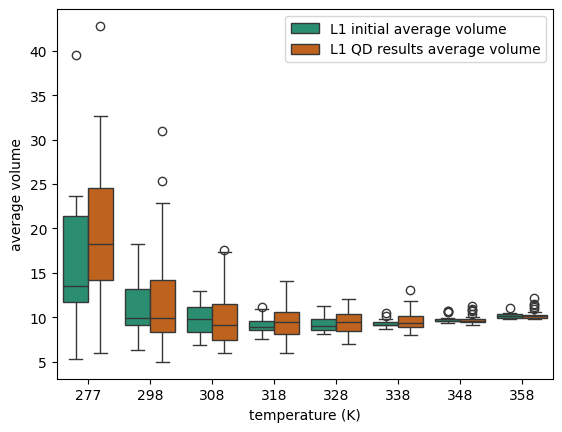

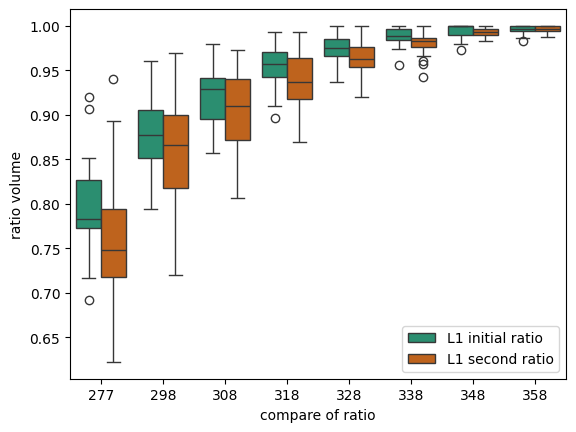

In [188]:
graph_temp_2()

In [189]:
graph_temp_2(file_path1='../dataset/L2_data_initial.pkl', file_path2='../dataset/L2_data_QD_1.pkl',  title="")

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/L2_data_QD_1.pkl'

In [63]:
def graph_temp_2(file_path1='../dataset/L1_data_initial.pkl', file_path2='../dataset/L1_data_QD_1.pkl', title=""):
    # pklファイルからデータを読み込む
    with open(file_path1, 'rb') as f:
        data1 = pickle.load(f)
    with open(file_path2, 'rb') as f:
        data2 = pickle.load(f)

    print(data1)

    # データの準備
    L1_ave = {key: [] for key in ["277", "298", "308", "318", "328", "338", "348", "358"]}
    L1_ratio = {key: [] for key in ["277", "298", "308", "318", "328", "338", "348", "358"]}
    L2_ave = {key: [] for key in ["277", "298", "308", "318", "328", "338", "348", "358"]}
    L2_ratio = {key: [] for key in ["277", "298", "308", "318", "328", "338", "348", "358"]}

    for key, value in data1.items():
        if key[0] in L1_ave:
            L1_ave[key[0]].append(value['mean_volume'])
            L1_ratio[key[0]].append(value['ratio_of_volume'])

    for key, value in data2.items():
        if key[0] in L2_ave:
            L2_ave[key[0]].append(value['mean_volume'])
            L2_ratio[key[0]].append(value['ratio_of_volume'])

    print("L1_ave:", L1_ave)
    print("L2_ave:", L2_ave)
    
    L1_ave_df = pd.DataFrame(L1_ave)
    L2_ave_df = pd.DataFrame(L2_ave)
    L1_ratio_df = pd.DataFrame(L1_ratio)
    L2_ratio_df = pd.DataFrame(L2_ratio)

    # データフレームをマージする
    L1_ave_melt = pd.melt(L1_ave_df)
    L1_ave_melt['species'] = 'data1 average'
    L2_ave_melt = pd.melt(L2_ave_df)
    L2_ave_melt['species'] = 'data2 average'

    L1_ratio_melt = pd.melt(L1_ratio_df)
    L1_ratio_melt['species'] = 'data1 ratio'
    L2_ratio_melt = pd.melt(L2_ratio_df)
    L2_ratio_melt['species'] = 'data2 ratio'

    df_ave = pd.concat([L1_ave_melt, L2_ave_melt], axis=0)
    df_ratio = pd.concat([L1_ratio_melt, L2_ratio_melt], axis=0)

    print("df_ave head:\n", df_ave.head())
    print("df_ratio head:\n", df_ratio.head())

    # 箱ひげ図の作成
    fig, ax = plt.subplots()
    sns.boxplot(x='variable', y='value', data=df_ave, hue='species', palette='Dark2', ax=ax)
    ax.set_xlabel('compare of average volume')
    ax.set_ylabel('average volume')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots()
    sns.boxplot(x='variable', y='value', data=df_ratio, hue='species', palette='Dark2', ax=ax)
    ax.set_xlabel('compare of ratio')
    ax.set_ylabel('ratio volume')
    ax.legend()
    plt.show()


{('308', '../input/results/initial/L1_initial_9'): {'ratio_of_volume': 0.86, 'mean_volume': 10.310513323010614, 'deviation_of_volume': 8.517930626969527}, ('348', '../input/results/initial/L1_initial_9'): {'ratio_of_volume': 0.9800000000000001, 'mean_volume': 10.658312717391983, 'deviation_of_volume': 8.703970690816213}, ('277', '../input/results/initial/L1_initial_9'): {'ratio_of_volume': 0.6916666666666667, 'mean_volume': 39.54105845701534, 'deviation_of_volume': 8.521993253605102}, ('358', '../input/results/initial/L1_initial_9'): {'ratio_of_volume': 0.9966666666666667, 'mean_volume': 10.190424575115227, 'deviation_of_volume': 8.647610436991878}, ('298', '../input/results/initial/L1_initial_9'): {'ratio_of_volume': 0.8433333333333334, 'mean_volume': 9.777752000164007, 'deviation_of_volume': 8.667137733660653}, ('318', '../input/results/initial/L1_initial_9'): {'ratio_of_volume': 0.9400000000000001, 'mean_volume': 8.937699340296785, 'deviation_of_volume': 8.667999226422149}, ('328', 

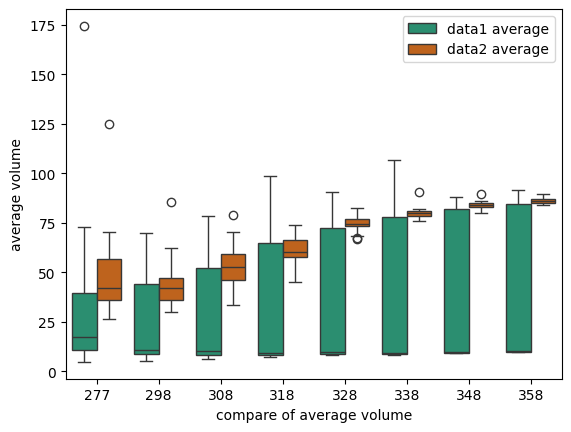

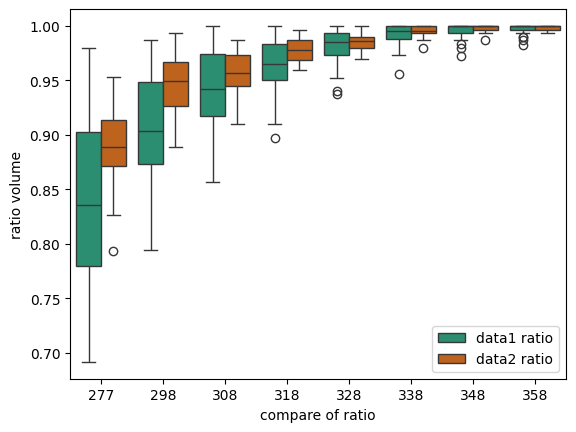

In [66]:
graph_temp_2(file_path1='../dataset/L3_data_initial.pkl', file_path2='../dataset/L3_data_int_initial.pkl',  title="L3")
# graph_temp_2(file_path1='../dataset/L3_data_int_initial.pkl', file_path2='../dataset/L3_data_initial.pkl',  title="L3")

大きい構造体を探す

In [233]:
file_path1 = "../dataset/L1_data_QD_1.pkl"
# file_path1 = "../dataset/L3_data_int_initial.pkl"
with open(file_path1, 'rb') as f:
    data1 = pickle.load(f)

max_vol = 0
target_path = ""
for key in data1:
    if max_vol < data1[key]["mean_volume"]:
        target_path = key[1]
        max_vol = data1[key]["mean_volume"]

print(target_path)
# home/user/SA-EDS/int_initial/L3_initial_MSS_9
target_path = "../" + ("/").join(target_path.split("/")[3:])
print(target_path)




../input/results/QD_1/L1_1/r1712111316774-61
../QD_1/L1_1/r1712111316774-61


In [234]:
import glob
import datetime
import analyze.count_strands as cs


def make_data_dir_initial(path):
    dirs = glob.glob(path + "/*")
    dic = {}
    print(dirs)
    # y作る
    for index, d in enumerate(dirs):
        print(datetime.datetime.now(), " : ", index + 1, "/", len(dirs))
        if cd.included_full_files(d) == False:
            continue
        print(d)
        # make bonds
        # rob.make_bonds(d)
        before, after = cs.count_strands(d)
        meanv, devv = cv.convexhull_volume_all_strands_meandev(d)
        dic[d] = {}
        dic[d]["ratio_of_volume"] = after/before
        dic[d]["mean_volume"] = meanv
        dic[d]["deviation_of_volume"] = devv
        
    
    return dic



In [235]:
dic = make_data_dir_initial(target_path)
print(dic)

['../QD_1/L1_1/r1712111316774-61/r1712111316774-61_348_8', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_308_7', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_308_9', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_348_6', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_348_1', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_308_8', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_348_7', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_308_1', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_348_9', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_308_6', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_298_4', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_298_3', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_277_7', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_318_8', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_358_7', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_318_1', '../QD_1/L1_1/r1712111316774-61/r1712111316774-61_358_9', '../QD_1/L1_1

In [236]:
max_vol = 0
max_ratio = 1
target_path_vol = ""
target_path_ratio = ""
for key in dic:
    if max_vol < dic[key]["mean_volume"]:
        target_path_vol = key
        max_vol = dic[key]["mean_volume"]
    if max_ratio > dic[key]["ratio_of_volume"]:
        target_path_ratio = key
        max_ratio = dic[key]["ratio_of_volume"]
print(target_path_vol, max_vol, target_path_ratio, max_ratio)

../QD_1/L1_1/r1712111316774-61/r1712111316774-61_277_8 73.95854864713016 ../QD_1/L1_1/r1712111316774-61/r1712111316774-61_277_5 0.5333333333333333


In [237]:
os.chdir("/Users/hyakuzukamaya/Desktop/lab/SA-EDS/scripts")

In [230]:
import importlib
import measuring_volume.convexhull_volume2 as cv
importlib.reload(cv)
target_particle = cv.get_max_convexhull_volume(target_path_vol)
print(target_particle)
# 新しい generate.top, last_confを作成する

../int_initial/L3_initial_MSS_6/L3-GA100000-0.50-MSS-6_277_1/last_conf_L3-GA100000-0.50-MSS-6_277_1.dat.dat.rxyz is exist.
../int_initial/L3_initial_MSS_6/L3-GA100000-0.50-MSS-6_277_1/last_conf_L3-GA100000-0.50-MSS-6_277_1.dat.dat.rxyz
16 15
17 5
18 4
19 2
25 5
26 21
29 15
15 1
30 2
21
{1: 2557.948870346958, 2: 193.40650730545158, 3: 25.59192264389318, 4: 107.64476601520224, 5: 2093.7068315761835, 6: 25.269795269860012, 7: 31.08946393170694, 8: 14.17885751137902, 9: 15.82221216768267, 10: 22.432997438692464, 11: 13.163271636654136, 12: 19.525191067896895, 13: 13.598443343315338, 14: 11.217556796847331, 20: 20.012635245312925, 21: 1514.9840419419927, 22: 30.774904022385467, 23: 21.59079162668227, 24: 16.95909010572908, 27: 19.40790242650329, 28: 18.402234752449903}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 714, 715, 716, 717, 718, 719, 

In [232]:
import common.get_target_file as gtf
conf_path = gtf.get_conf(target_path_vol)
top_path = gtf.get_top(target_path_vol)

conf_f = open(conf_path, "r")
top_f = open(top_path, "r")

print(top_path)

# generate topology
new_top_path = ("/").join(top_path.split("/")[:-1]) + "/new_top"
new_top_f = open(new_top_path, "w")

strand_set = set([])
new_top_lst = []
strand_num = 0

new_i = 0

for i, l in enumerate(top_f):
    if i - 1 in target_particle:
        strand_set.add(l.split(" ")[0])
        base = l.split(" ")[1]
        left_p = int(l.split(" ")[2])
        right_p = int(l.split(" ")[3])
        if left_p != -1:
            left_p = new_i - 1
        if right_p != -1:
            right_p = new_i + 1
        new_l = f"{len(strand_set)} {base} {left_p} {right_p}\n"
        new_top_lst.append(new_l)
        new_i += 1

print("strand number is : ", len(strand_set))
new_top_f.write(f"{len(target_particle)} {len(strand_set)}\n")

for l in new_top_lst:
    new_top_f.write(l)

print(new_top_path)
new_top_f.close()

# generate conf
new_conf_path = ("/").join(conf_path.split("/")[:-1]) + "/new_conf"
new_conf_f = open(new_conf_path, "w")

print(conf_path)

for i, l in enumerate(conf_f):
    if i < 3:
        new_conf_f.write(l)
    if i - 3 in target_particle:
        new_conf_f.write(l)

print(new_conf_path)

../int_initial/L3_initial_MSS_6/L3-GA100000-0.50-MSS-6_277_1/generated_L3-GA100000-0.50-MSS-6_277_1.top
strand number is :  4
../int_initial/L3_initial_MSS_6/L3-GA100000-0.50-MSS-6_277_1/new_top
../int_initial/L3_initial_MSS_6/L3-GA100000-0.50-MSS-6_277_1/last_conf_L3-GA100000-0.50-MSS-6_277_1.dat.dat
../int_initial/L3_initial_MSS_6/L3-GA100000-0.50-MSS-6_277_1/new_conf
